In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import zipfile

import os
from sklearn.model_selection import train_test_split 

for dirname, _, filenames in os.walk('ford_price(2020) data.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df = pd.read_excel('Ford.xlsx', sheet_name='Ford')
df

,model,year,price,type,distance,fuel,tax,miles per galoon,size
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2015,7830,Manual,50124,Diesel,0,74.3,1.5
2,Fiesta,2016,10798,Manual,11843,Petrol,0,65.7,1.0
3,Focus,2019,15495,Manual,5600,Petrol,145,60.1,1.0
4,B-MAX,2013,5698,Manual,44901,Petrol,145,47.1,1.4
...,...,...,...,...,...,...,...,...,...
372,EcoSport,2017,9298,Manual,16770,Petrol,145,44.8,1.5
373,B-MAX,2014,7498,Semi-Auto,33023,Petrol,160,44.1,1.6
374,Fiesta,2019,14698,Manual,8725,Petrol,145,58.9,1.0
375,Focus,2017,11995,Manual,23469,Petrol,125,51.4,1.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   model             377 non-null    object 
 1   year              377 non-null    int64  
 2   price             377 non-null    int64  
 3   type              377 non-null    object 
 4   distance          377 non-null    int64  
 5   fuel              377 non-null    object 
 6   tax               377 non-null    int64  
 7   miles per galoon  377 non-null    float64
 8   size              377 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 26.6+ KB


В датасет нет пропущенных знaчений

In [5]:
df.isnull().sum()

model               0
year                0
price               0
type                0
distance            0
fuel                0
tax                 0
miles per galoon    0
size                0
dtype: int64

In [6]:
df.dtypes

model                object
year                  int64
price                 int64
type                 object
distance              int64
fuel                 object
tax                   int64
miles per galoon    float64
size                float64
dtype: object

In [7]:
df.describe()

,year,price,distance,tax,miles per galoon,size
count,377.000000,377.000000,377.000000,377.00000,377.000000,377.000000
mean,2017.140584,12905.448276,20959.151194,114.94695,57.718568,1.361538
std,1.568938,4266.983147,15082.638872,57.93657,8.954505,0.400904
min,2013.000000,4699.000000,7.000000,0.00000,34.400000,1.000000
25%,2016.000000,9698.000000,9781.000000,125.00000,53.300000,1.000000
50%,2017.000000,12198.000000,17028.000000,145.00000,58.900000,1.200000
75%,2018.000000,15984.000000,29326.000000,145.00000,64.200000,1.600000
max,2020.000000,34498.000000,85000.000000,240.00000,80.700000,2.300000


In [8]:
df.columns

Index(['model', 'year', 'price', 'type', 'distance', 'fuel', 'tax',
       'miles per galoon', 'size'],
      dtype='object')

In [9]:
df.columns = ['model', 'year', 'price', 'type', 'distance', 'fuel', 'tax',
       'miles per galoon', 'size']

In [10]:
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std()
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std()
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

In [11]:
df = outliers(df)
df.describe()

,year,price,distance,tax,miles per galoon,size
count,377.000000,377.000000,377.000000,377.00000,377.000000,377.000000
mean,2017.140584,12882.128376,20840.905229,114.94695,57.718568,1.361538
std,1.568938,4171.620044,14661.701999,57.93657,8.954505,0.400904
min,2013.000000,4699.000000,7.000000,0.00000,34.400000,1.000000
25%,2016.000000,9698.000000,9781.000000,125.00000,53.300000,1.000000
50%,2017.000000,12198.000000,17028.000000,145.00000,58.900000,1.200000
75%,2018.000000,15984.000000,29326.000000,145.00000,64.200000,1.600000
max,2020.000000,25706.397718,66207.067810,240.00000,80.700000,2.300000


In [12]:
df.shape

(377, 9)

In [13]:
df['type'].nunique()

3

In [14]:
for col in df:
    print(df['type'].unique())

['Automatic' 'Manual' 'Semi-Auto']
['Automatic' 'Manual' 'Semi-Auto']
['Automatic' 'Manual' 'Semi-Auto']
['Automatic' 'Manual' 'Semi-Auto']
['Automatic' 'Manual' 'Semi-Auto']
['Automatic' 'Manual' 'Semi-Auto']
['Automatic' 'Manual' 'Semi-Auto']
['Automatic' 'Manual' 'Semi-Auto']
['Automatic' 'Manual' 'Semi-Auto']


In [15]:
#encoding transmission
from sklearn import preprocessing
df['type'] = preprocessing.LabelEncoder().fit_transform(df['type'])
df.head(5)

,model,year,price,type,distance,fuel,tax,miles per galoon,size
0,Fiesta,2017,12000.0,0,15944.0,Petrol,150,57.7,1.0
1,Focus,2015,7830.0,1,50124.0,Diesel,0,74.3,1.5
2,Fiesta,2016,10798.0,1,11843.0,Petrol,0,65.7,1.0
3,Focus,2019,15495.0,1,5600.0,Petrol,145,60.1,1.0
4,B-MAX,2013,5698.0,1,44901.0,Petrol,145,47.1,1.4


К числовому формату привели фактор type

In [16]:
df['fuel'].nunique()

3

In [17]:
for col in df:
    print(df['fuel'].unique())

['Petrol' 'Diesel' 'Hybrid']
['Petrol' 'Diesel' 'Hybrid']
['Petrol' 'Diesel' 'Hybrid']
['Petrol' 'Diesel' 'Hybrid']
['Petrol' 'Diesel' 'Hybrid']
['Petrol' 'Diesel' 'Hybrid']
['Petrol' 'Diesel' 'Hybrid']
['Petrol' 'Diesel' 'Hybrid']
['Petrol' 'Diesel' 'Hybrid']


In [18]:
#encoding fuel
from sklearn import preprocessing
df['fuel'] = preprocessing.LabelEncoder().fit_transform(df['fuel'])
df.head(5)

,model,year,price,type,distance,fuel,tax,miles per galoon,size
0,Fiesta,2017,12000.0,0,15944.0,2,150,57.7,1.0
1,Focus,2015,7830.0,1,50124.0,0,0,74.3,1.5
2,Fiesta,2016,10798.0,1,11843.0,2,0,65.7,1.0
3,Focus,2019,15495.0,1,5600.0,2,145,60.1,1.0
4,B-MAX,2013,5698.0,1,44901.0,2,145,47.1,1.4


К числовому формату привели фактор fuel

In [19]:
df['model'].nunique()

17

In [20]:
for col in df:
    print(df['model'].unique())

['Fiesta' 'Focus' 'B-MAX' 'Kuga' 'EcoSport' 'C-MAX' 'Ka+' 'S-MAX' 'Edge'
 'Mondeo' 'Grand Tourneo Connect' 'Galaxy' 'Tourneo Connect' 'Grand C-MAX'
 'Tourneo Custom' 'Puma' 'KA']
['Fiesta' 'Focus' 'B-MAX' 'Kuga' 'EcoSport' 'C-MAX' 'Ka+' 'S-MAX' 'Edge'
 'Mondeo' 'Grand Tourneo Connect' 'Galaxy' 'Tourneo Connect' 'Grand C-MAX'
 'Tourneo Custom' 'Puma' 'KA']
['Fiesta' 'Focus' 'B-MAX' 'Kuga' 'EcoSport' 'C-MAX' 'Ka+' 'S-MAX' 'Edge'
 'Mondeo' 'Grand Tourneo Connect' 'Galaxy' 'Tourneo Connect' 'Grand C-MAX'
 'Tourneo Custom' 'Puma' 'KA']
['Fiesta' 'Focus' 'B-MAX' 'Kuga' 'EcoSport' 'C-MAX' 'Ka+' 'S-MAX' 'Edge'
 'Mondeo' 'Grand Tourneo Connect' 'Galaxy' 'Tourneo Connect' 'Grand C-MAX'
 'Tourneo Custom' 'Puma' 'KA']
['Fiesta' 'Focus' 'B-MAX' 'Kuga' 'EcoSport' 'C-MAX' 'Ka+' 'S-MAX' 'Edge'
 'Mondeo' 'Grand Tourneo Connect' 'Galaxy' 'Tourneo Connect' 'Grand C-MAX'
 'Tourneo Custom' 'Puma' 'KA']
['Fiesta' 'Focus' 'B-MAX' 'Kuga' 'EcoSport' 'C-MAX' 'Ka+' 'S-MAX' 'Edge'
 'Mondeo' 'Grand Tourneo Connect

In [21]:
#encoding body
from sklearn import preprocessing
df['model'] = preprocessing.LabelEncoder().fit_transform(df['model'])
df.head(10)

,model,year,price,type,distance,fuel,tax,miles per galoon,size
0,4,2017,12000.0,0,15944.0,2,150,57.7,1.0
1,5,2015,7830.0,1,50124.0,0,0,74.3,1.5
2,4,2016,10798.0,1,11843.0,2,0,65.7,1.0
3,5,2019,15495.0,1,5600.0,2,145,60.1,1.0
4,0,2013,5698.0,1,44901.0,2,145,47.1,1.4
5,5,2019,14799.0,1,6249.0,2,145,60.1,1.0
6,5,2019,17498.0,1,2714.0,2,150,49.6,1.0
7,4,2016,9998.0,1,6820.0,2,0,65.7,1.0
8,11,2017,16998.0,1,13626.0,0,125,60.1,2.0
9,11,2017,16200.0,2,23027.0,0,145,58.9,1.5


К числовому формату привели фактор model

In [22]:
df.dtypes

model                 int32
year                  int64
price               float64
type                  int32
distance            float64
fuel                  int32
tax                   int64
miles per galoon    float64
size                float64
dtype: object

# Визуализация факторов

<AxesSubplot:ylabel='Frequency'>

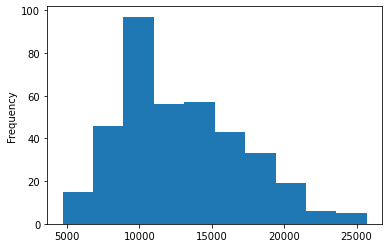

In [23]:
df['price'].plot(kind = 'hist')

Для большиства моделей цена варьируется от 7.5 до 15 тыс. у.е.

<AxesSubplot:ylabel='Frequency'>

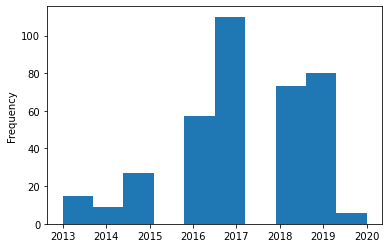

In [24]:
df['year'].plot(kind = 'hist')

Большинство моделей 2017 года выпуска

<AxesSubplot:ylabel='Frequency'>

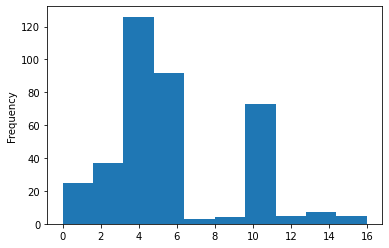

In [26]:
df['model'].plot(kind = 'hist')

Самая распространенная модель Kuga

<AxesSubplot:ylabel='Frequency'>

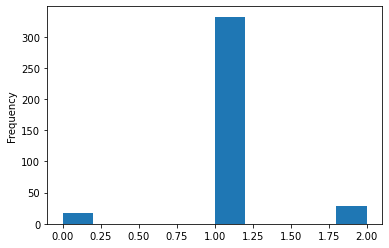

In [27]:
df['type'].plot(kind = 'hist')

Самая распространенная коробка передач - Manual

<AxesSubplot:ylabel='Frequency'>

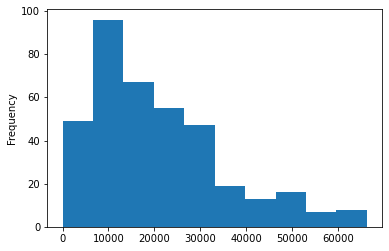

In [28]:
df['distance'].plot(kind = 'hist')

Большинство автомобилей имеют пробег до 35 тыс. км

<AxesSubplot:ylabel='Frequency'>

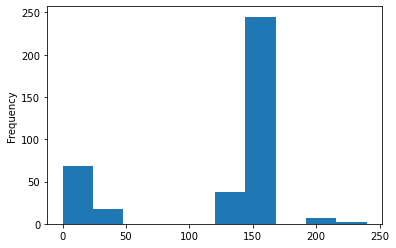

In [29]:
df['tax'].plot(kind = 'hist')

реимущественное большиство моделей выборки имеют налог 150-175 у.е.

<AxesSubplot:ylabel='Frequency'>

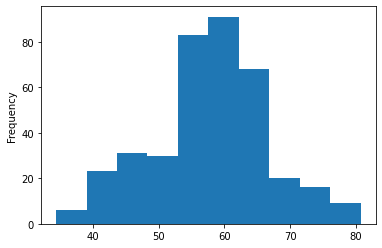

In [30]:
df['miles per galoon'].plot(kind = 'hist')

78 моделей имеют расход топлива 55-65 миль на галлон

<AxesSubplot:ylabel='Frequency'>

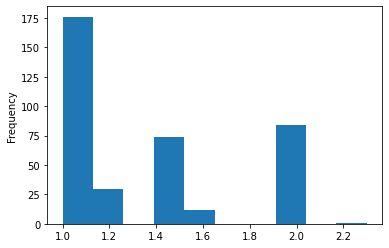

In [31]:
df['size'].plot(kind = 'hist')

Самый распространенный объем двигателя - 1.0 л

In [33]:
df.to_csv('ford1.csv', sep=',', index=False)

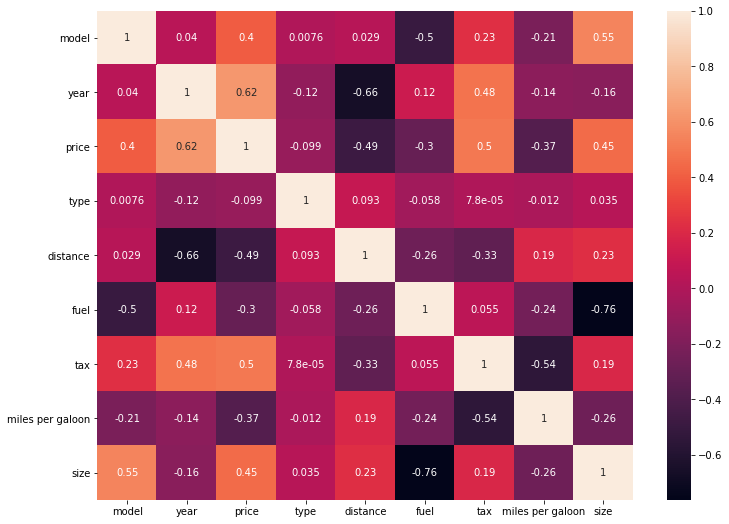

In [34]:
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

Наибольшая корреляция между факторами Цена и Год

In [36]:
df.describe()

,model,year,price,type,distance,fuel,tax,miles per galoon,size
count,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.00000,377.000000,377.000000
mean,5.687003,2017.140584,12882.128376,1.029178,20840.905229,1.286472,114.94695,57.718568,1.361538
std,3.501924,1.568938,4171.620044,0.344713,14661.701999,0.957975,57.93657,8.954505,0.400904
min,0.000000,2013.000000,4699.000000,0.000000,7.000000,0.000000,0.00000,34.400000,1.000000
25%,4.000000,2016.000000,9698.000000,1.000000,9781.000000,0.000000,125.00000,53.300000,1.000000
50%,5.000000,2017.000000,12198.000000,1.000000,17028.000000,2.000000,145.00000,58.900000,1.200000
75%,7.000000,2018.000000,15984.000000,1.000000,29326.000000,2.000000,145.00000,64.200000,1.600000
max,16.000000,2020.000000,25706.397718,2.000000,66207.067810,2.000000,240.00000,80.700000,2.300000
